In [8]:
%matplotlib inline
%env KERAS_BACKEND = tensorflow  
##確保一致性
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist    #資料庫
from keras.utils import np_utils    #轉為分類問題
from keras.utils import to_categorical 
from keras.models import Sequential #神經網路相關套件  標準
from keras.layers import Dense, Activation
from keras.optimizers import SGD    #隨機調整
from keras.optimizers import Adam
from ipywidgets import interact_manual
from keras.models import Model  #Functional API
from keras.layers import Input  #以函數來代替input_dim  
from keras.layers import concatenate, add  # 用來介接分歧的模型

env: KERAS_BACKEND=tensorflow


輸入資料

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()   #載入資料
x_train = x_train.reshape(60000, 784)   #調整成神經網路的輸入格式
x_test = x_test.reshape(10000, 784)
y_train = np_utils.to_categorical(y_train, 10)   #轉為分類問題
y_test = np_utils.to_categorical(y_test, 10)
y_train[99]   #檢查

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

建立 Functional API 模型

In [6]:
#試分層兩層hidden layer 第二層有三個分歧
f_1 = Dense(50, activation='relu')
f_2 = Dense(100, activation='sigmoid') #其中一個使用不同的activation function
f_3 = Dense(50, activation='relu')
f_4 = Dense(100, activation='relu')
f_5 = Dense(10, activation='softmax')

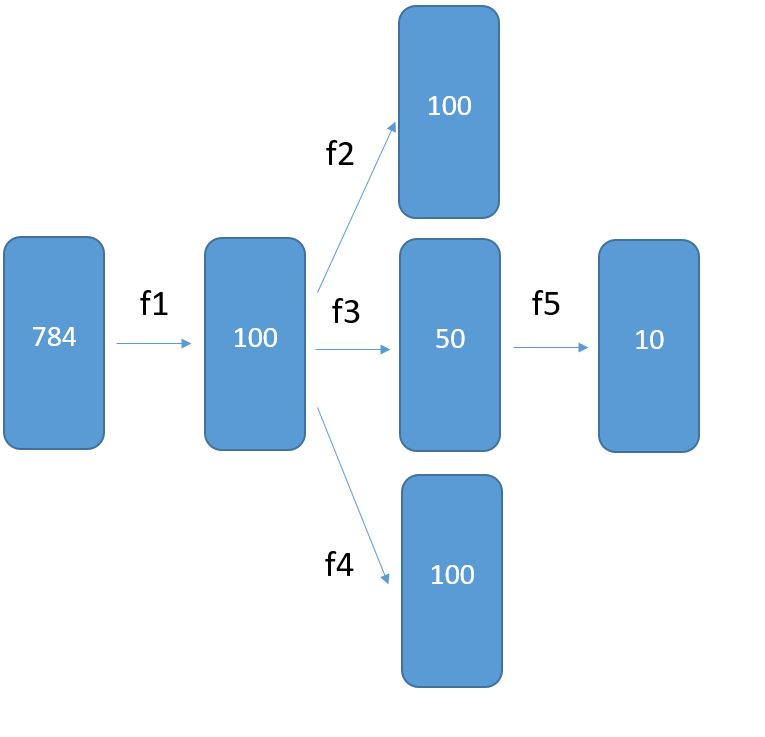

In [21]:
from IPython.display import Image  #插入圖片
Image("layer.png")

In [11]:
#輸入
x = Input(shape=(784,))  
#第一層
h_1 = f_1(x)
#第二層
h_2 = f_2(h_1)
h_3 = f_3(h_1)
h_4 = f_4(h_1)
#合併第二層
u = concatenate([h_2, h_3,h_4])  
#輸出
y = f_5(u)

檢查

In [13]:
print(u)
print(y)

Tensor("concatenate_2/concat:0", shape=(?, 250), dtype=float32)
Tensor("dense_5/Softmax:0", shape=(?, 10), dtype=float32)


In [14]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 50)           39250       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 100)          5100        dense_1[1][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 50)           2550        dense_1[1][0]                    
__________________________________________________________________________________________________
dense_4 (D

In [15]:
model.compile(loss='categorical_crossentropy',   #多分類問題使用categorical_crossentropy
              optimizer=Adam(lr=0.001), metrics=["accuracy"])  #選擇常用optimizer Adam

In [16]:
model_1 = model.fit(x_train, y_train, 
                    batch_size=100, epochs=15, verbose=1,
                    validation_data =(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 7s 124us/step - loss: 2.6455 - acc: 0.8149 - val_loss: 1.4870 - val_acc: 0.8915
Epoch 2/15
60000/60000 [==============================] - 5s 80us/step - loss: 1.1507 - acc: 0.9161 - val_loss: 1.0686 - val_acc: 0.9249
Epoch 3/15
60000/60000 [==============================] - 5s 81us/step - loss: 1.0277 - acc: 0.9272 - val_loss: 0.9112 - val_acc: 0.9367
Epoch 4/15
60000/60000 [==============================] - 5s 78us/step - loss: 0.9397 - acc: 0.9335 - val_loss: 0.9675 - val_acc: 0.9345
Epoch 5/15
60000/60000 [==============================] - 5s 75us/step - loss: 0.8847 - acc: 0.9391 - val_loss: 0.9589 - val_acc: 0.9342
Epoch 6/15
60000/60000 [==============================] - 4s 73us/step - loss: 0.8407 - acc: 0.9430 - val_loss: 0.7500 - val_acc: 0.9492
Epoch 7/15
60000/60000 [==============================] - 4s 74us/step - loss: 

計算正確率

10000/10000 [==============================] - 1s 66us/step
loss: 0.7854292288939688
正確率 0.9493


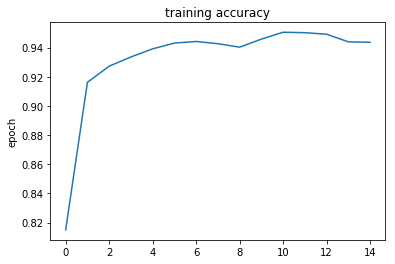

In [17]:
plt.plot(model_1.history["acc"])
plt.title("training accuracy")
plt.ylabel("accuracy")
plt.ylabel("epoch") #訓練次數
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])